<a href="https://colab.research.google.com/github/fendiirfan/Kaggle-Titanic---Machine-Learning-from-Disaster/blob/main/Kaggle_Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pickle

In [2]:
pip install category-encoders

     |████████████████████████████████| 81kB 4.4MB/s 


In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/Kaggle-Titanic---Machine-Learning-from-Disaster/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/Kaggle-Titanic---Machine-Learning-from-Disaster/main/test.csv')

# **EDA**

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train = df_train.drop(['PassengerId','Ticket','Name','Cabin','Embarked'],axis=1)

In [6]:
df_train.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000


In [7]:
print(df_train.isnull().any(),'\n')
print('JUMLAH\n', df_train.isna().sum())

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool 

JUMLAH
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [8]:
df_train = df_train.dropna()

In [9]:
print(df_train.isnull().any(),'\n')
print('JUMLAH\n', df_train.isna().sum())

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool 

JUMLAH
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [10]:
import category_encoders as ce
def oneHotEncoder(coloumn,df_train):
    encoder=ce.OneHotEncoder(cols=coloumn,handle_unknown='return_nan',return_df=True,use_cat_names=True)
    return encoder.fit_transform(df_train[coloumn])


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
df_train = pd.concat([df_train,oneHotEncoder('Sex',df_train)], axis=1) #menambahkan coloumn hasil encoder
df_train.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_male,Sex_female
0,0,3,male,22.0,1,0,7.2500,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,0.0,1.0
2,1,3,female,26.0,0,0,7.9250,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,1.0,0.0


In [12]:
df_train = df_train.drop(['Sex'],axis=1) #drop coloumn Sex

Balance/Imbalance dataset

In [13]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 38.3MB 2.5MB/s
     |████████████████████████████████| 81kB 2.1MB/s 
     |████████████████████████████████| 1.1MB 16.0MB/s 
     |████████████████████████████████| 3.2MB 27.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 296kB 48.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=a33b2c4294ef275e70c7b4d9851721431117b48a26a8368517c003706ddebd93
  Stored in directory: /tmp/pip-ephem-wheel-cache-3qs8z2nj/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=6add720fc0695473e3223fb487d653e42fad85f914f95ac4f069859681cec120
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=

In [14]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [15]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Outlier Removal**

In [16]:
def array_to_df(array):
  return pd.DataFrame(array,columns = ['Age', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp']) #mengubah numpay array ke df kembali

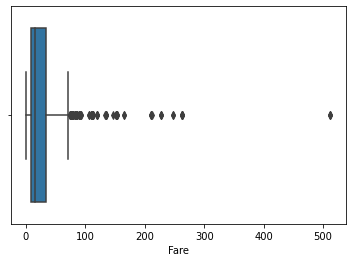

In [17]:
used_coloumn = ['Age', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp']
sns.boxplot(x=df_train['Fare'])

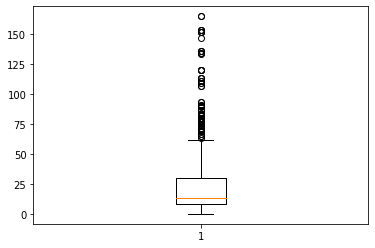

In [18]:
# droping outliers
from scipy import stats
import numpy as np


z = np.abs(stats.zscore(df_train))
threshold = 3
df_train = df_train[(z < 3).all(axis=1)]

# Creating plot
plt.boxplot(df_train['Fare'])
    
# show plot
plt.show()

In [19]:
df_train.shape

(657, 8)

## **Imbalancing dataset**

In [20]:
# # from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

ns = SMOTETomek(1.0)
X_ns,y_ns = ns.fit_sample(df_train[['Age', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp']],df_train['Survived'])



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [21]:
X_ns = array_to_df(X_ns) #mengubah numpay array ke df kembali
y_ns = pd.DataFrame(y_ns,columns = ['Survived'])

In [22]:
y_ns.value_counts()

Survived
1           352
0           352
dtype: int64

## **Normalization/Standardization**

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_ns)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
X_ns = scaler.transform(X_ns)

In [25]:
X_ns = array_to_df(X_ns)
X_ns.head()

,Age,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
0,0.305752,0.043975,0.0,1.0,0.0,1.0,0.333333
1,0.532445,0.432369,0.0,0.0,1.0,0.0,0.333333
2,0.362426,0.048069,0.0,1.0,1.0,0.0,0.000000
3,0.489940,0.322078,0.0,0.0,1.0,0.0,0.333333
4,0.489940,0.048827,0.0,1.0,0.0,1.0,0.000000


In [33]:
y_ns.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## **SPLIT**

In [26]:
X_ns = array_to_df(X_ns) #mengubah numpay array ke df kembali

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_ns,
                                                    y_ns, #coloumn Survived
                                                    test_size=0.20,
                                                    random_state=1
)

# **TRAIN MODEL**

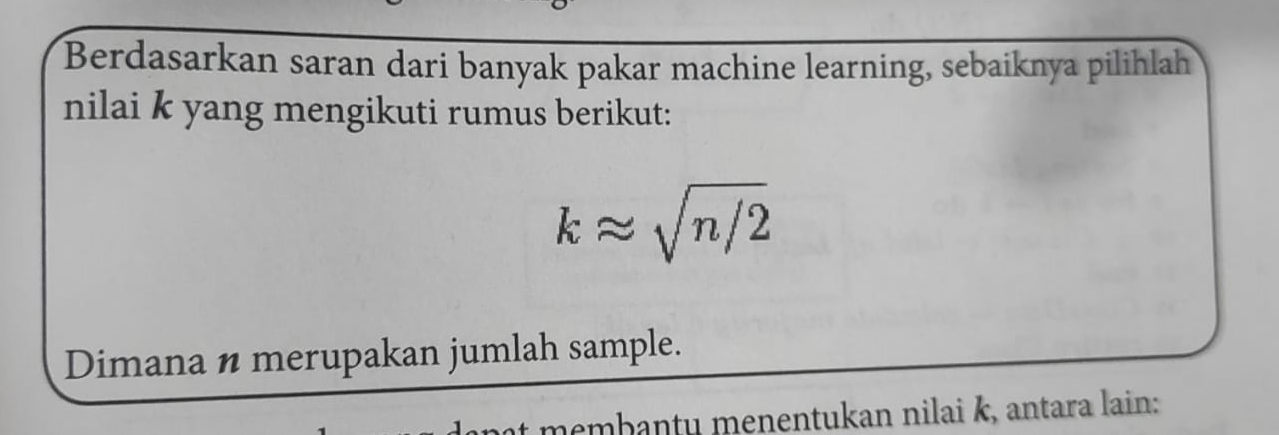

In [37]:
model = []

from sklearn.neighbors import KNeighborsClassifier
model.append(KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_train)/2))))
# model.append(KNeighborsClassifier(n_neighbors=int(20)))




import xgboost as xgb
xgb_model = xgb.XGBClassifier()

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
optimization_dict = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model.append(RandomizedSearchCV(xgb_model, optimization_dict, 
                     n_iter=100,
                     scoring='f1_weighted', 
                     n_jobs=4, verbose=0, 
                     random_state=1001)
)

# import xgboost as xgb
# model.append(xgb.XGBClassifier())

from sklearn.svm import SVC
model.append(SVC())


from sklearn.cluster import KMeans
model.append(KMeans(n_clusters=2))



In [38]:
from sklearn.metrics import accuracy_score,classification_report

for valueModel in model:
  print(valueModel,' \n')
  valueModel.fit(X_train,y_train)
  yPredict = valueModel.predict(X_val)
  score = accuracy_score(y_val,yPredict)
  report = classification_report(y_val,yPredict)
  print('Accuracy : ', score,'\n')
  print(report)
  print('\n')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')  

Accuracy :  0.8226950354609929 

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        67
           1       0.86      0.80      0.83        74

    accuracy                           0.82       141
   macro avg       0.82      0.82      0.82       141
weighted avg       0.82      0.82      0.82       141



RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy :  0.8794326241134752 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        67
           1       0.90      0.86      0.88        74

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  

Accuracy :  0.8085106382978723 

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        67
           1       0.87      0.74      0.80        74

    accuracy                           0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.82      0.81      0.81       141



KMeans(algorithm='auto'

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN ACC USING k-Fold Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
 
# mengevaluasi performa model dengan cross_val_score
score = cross_val_score(model[0], X_ns, y_ns, cv=5)

data = {'data':score}
print('\n',pd.DataFrame(data).describe())


            data
count  5.000000
mean   0.808217
std    0.047425
min    0.744681
25%    0.792857
50%    0.794326
75%    0.843972
max    0.865248


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [34]:
# model[0].predict([[0.489940,	0.048827,	0.0,	1.0,	0.0,	1.0,	0.000000]])

array([0])

# **Test**

In [ ]:
df_test.head()

In [ ]:
df_test.describe()

In [ ]:
temp = {
    'Data':df_test['PassengerId']
}

In [ ]:
df_test = df_test.drop(['PassengerId','Ticket','Name','Cabin','Embarked'],axis=1)

In [ ]:
df_test.isnull().any()

In [ ]:
df_test['Age'] = df_test['Age'].fillna(27.000000)
df_test['Fare'] = df_test['Fare'].fillna(14.454200)

df_test = pd.concat([df_test,oneHotEncoder('Sex',df_test)], axis=1) #menambahkan coloumn hasil encoder
df_test = df_test.drop(['Sex'],axis=1) #drop coloumn Sex

In [ ]:
df_test

In [ ]:
df_test = df_test[['Age', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp']]

data_predict = {
    'Survived': model.predict(df_test),
    'PassengerId': temp['Data']
}

In [ ]:
len(data_predict['Survived'])

In [ ]:
Tugas = pd.DataFrame(data_predict)
Tugas

In [ ]:
Tugas.to_csv(r'submission_fendi.csv',index=False)

# **DEPLOY**

In [39]:
pickle.dump(model[1],open('model.pkl','wb'))


# **Created By Fendi**